**Лабораторный практикум 8. Поверхности второго порядка.**

Загрузка необходимых библиотек:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sympy import *

**Упражнение 8.1. Построить поверхность $x^2-y^2=z$. Написать уравнения проекций данной поверхности на координатные плоскости.**

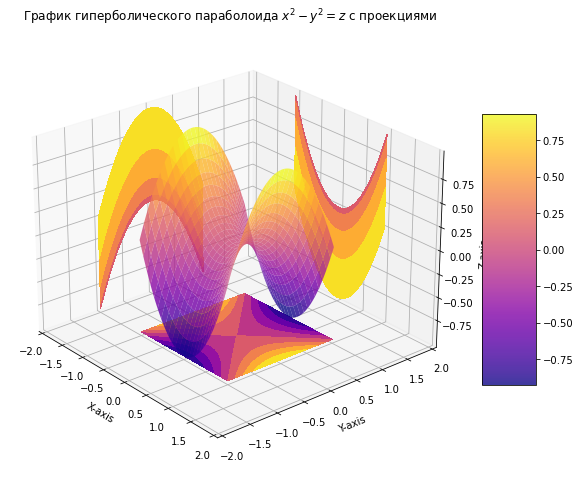

Уравнения проекций:
oxy: Пара пересекающихся прямых x^2-y^2=0
oxz: Парабола x^2=z
oyz: Парабола y^2=z


In [119]:
x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)
[x, y] = np.meshgrid(x, y)

z = lambda x, y: x**2 - y**2  # Уравнение параболоида
Z = z(x, y)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
my_cmap = plt.get_cmap("plasma")  # Создание цветовой карты

# Создание графиков
surf = ax.plot_surface(x, y, Z, rstride=8, cstride=8, alpha=0.8, cmap=my_cmap)
cset = ax.contourf(x, y, Z, zdir="z", offset=np.min(Z), cmap=my_cmap)
cset = ax.contourf(x, y, Z, zdir="x", offset=-2, cmap=my_cmap)
cset = ax.contourf(x, y, Z, zdir="y", offset=2, cmap=my_cmap)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

ax.set_xlabel("X-axis")
ax.set_xlim(-2, 2)
ax.set_ylabel("Y-axis")
ax.set_ylim(-2, 2)
ax.set_zlabel("Z-axis")
ax.set_zlim(np.min(Z), np.max(Z))
ax.set_title("График гиперболического параболоида $x^2-y^2=z$ с проекциями")
ax.view_init(25, -40)
plt.show()

print("Уравнения проекций:")
print("oxy:", "Пара пересекающихся прямых x^2-y^2=0")
print("oxz:", "Парабола x^2=z")
print("oyz:", "Парабола y^2=z")

**Упражнение 8.2. Построить сферу, используя ее параметрические уравнения.**

$\begin{equation*}
 \begin{cases}
   x=R*cos(φ)*cos(θ)
   \\
   y=R*sin(φ)*cos(θ)
   \\
   z=R*sin(θ)
 \end{cases}
\end{equation*}    \\0≤φ<2π;  \\-π/2≤θ≤π/2$

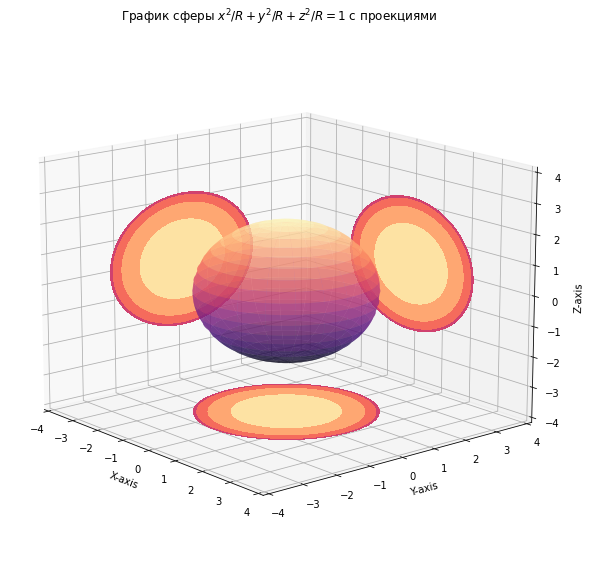

Проверка: [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [120]:
R = 5

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

# Коэффициенты уравнения
coefs = (R, R, R)
rx, ry, rz = np.sqrt(coefs)
u = np.linspace(0, 2 * np.pi, 200)  # Угол на плоскости
v = np.linspace(-np.pi / 2, np.pi / 2, 200)  # Угол в пространстве

# Уравнение эллипсоида
x = rx * np.outer(np.cos(u), np.cos(v))
y = ry * np.outer(np.sin(u), np.cos(v))
z = rz * np.outer(np.ones_like(u), np.sin(v))
my_cmap = plt.get_cmap("magma")
surf = ax.plot_surface(x, y, z, rstride=10, cstride=10, alpha=0.6, cmap=my_cmap)
cset = ax.contourf(x, y, z, zdir="z", offset=-4, cmap=my_cmap)
cset = ax.contourf(x, y, z, zdir="x", offset=-4, cmap=my_cmap)
cset = ax.contourf(x, y, z, zdir="y", offset=4, cmap=my_cmap)

ax.set_xlabel("X-axis")
ax.set_xlim(-4, 4)
ax.set_ylabel("Y-axis")
ax.set_ylim(-4, 4)
ax.set_zlabel("Z-axis")
ax.set_zlim(-4, 4)
ax.set_title("График сферы $x^2/R+y^2/R+z^2/R=1$ с проекциями")
ax.view_init(15, -40)
plt.show()

print("Проверка:", x**2 / R + y**2 / R + z**2 / R)


**Упражнение 8.3. Построить однополостный гиперболоид, используя его параметрические уравнения.**

$\begin{equation*}
 \begin{cases}
   x=a*cos(φ)*cosh(θ)
   \\
   y=b*sin(φ)*cosh(θ)
   \\
   z=c*sinh(θ)
 \end{cases}
\end{equation*}    \\0≤φ<2π;  \\-∞≤θ≤+∞$

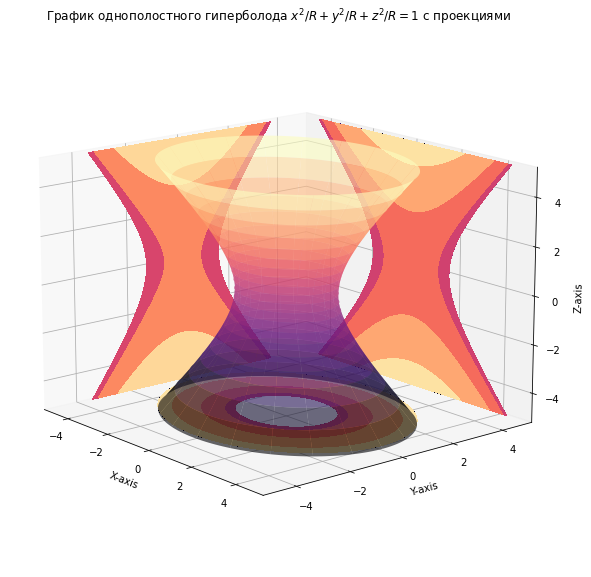

Проверка: [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [121]:
a = 3
b = 2
c = 5

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

# Коэффициенты уравнения
coefs = (a, b, c)
rx, ry, rz = np.sqrt(coefs)
u = np.linspace(0, 2 * np.pi, 200)  # Угол на плоскости
v = np.linspace(-np.pi / 2, np.pi / 2, 200)  # Угол в пространстве

# Уравнение эллипсоида
x = rx * np.outer(np.cos(u), np.cosh(v))
y = ry * np.outer(np.sin(u), np.cosh(v))
z = rz * np.outer(np.ones_like(u), np.sinh(v))
my_cmap = plt.get_cmap("magma")
surf = ax.plot_surface(x, y, z, rstride=10, cstride=10, alpha=0.6, cmap=my_cmap)
cset = ax.contourf(x, y, z, zdir="z", offset=-5, cmap=my_cmap)
cset = ax.contourf(x, y, z, zdir="x", offset=-5, cmap=my_cmap)
cset = ax.contourf(x, y, z, zdir="y", offset=5, cmap=my_cmap)

ax.set_xlabel("X-axis")
ax.set_xlim(-5, 5)
ax.set_ylabel("Y-axis")
ax.set_ylim(-5, 5)
ax.set_zlabel("Z-axis")
ax.set_zlim(-5, 5)
ax.set_title("График однополостного гиперболода $x^2/R+y^2/R+z^2/R=1$ с проекциями")
ax.view_init(15, -40)
plt.show()

print("Проверка:", x**2 / a + y**2 / b - z**2 / c)


**Упражнение 8.4. Построить параболический цилиндр $x^2-2x=2z$. Изобразить проекцию данной поверхности на плоскость $oxz$. Найти координаты вершины данной проекции.**

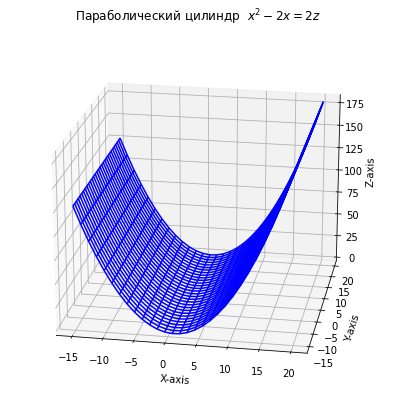

In [3]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")

x = np.linspace(-15, 20, 30)
y = np.linspace(-15, 20, 30)
x, y = np.meshgrid(x, y)
z = (x**2 - 2 * x) / 2
ax.plot_wireframe(x, y, z, color="b")
ax.set_title("Параболический цилиндр  $x^2-2x=2z$")
ax.view_init(20, -80)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.show()

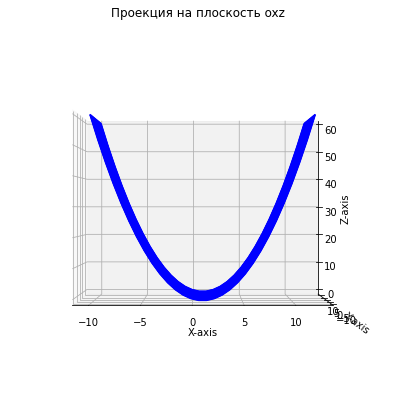

Вершина: (2, 0, 0)


In [20]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")

x = np.linspace(-10, 12, 30)
y = np.linspace(-10, 12, 30)
x, y = np.meshgrid(x, y)
z = (x**2 - 2 * x) / 2
ax.plot_wireframe(x, y, z, color="b")
ax.set_title("Проекция на плоскость oxz")
ax.view_init(0, -90)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.show()
print("Вершина: (2, 0, 0)")

**Упражнение 8.5. Найти точки пересечения поверхности $x^2-2x=2z$ и прямой, проходящей через точки $(8, –1, –3)$ и $(–4,3,3)$. Сделать рисунок. Нанести на него найденные точки.**

In [6]:
# уравнение прямой, проходящей через две точки р1 и р2
p1, р2 = Point(8, -1, -3), Point(-4, 3, 3)
L = Line(p1, р2)
L = L.arbitrary_point()
print("Параметрические уравнения прямой:", L)
x, z, t = symbols("x,z,t")
P = x**2 - 2 * x - 2 * z
PP = P.subs([(x, L[0]), (z, L[1])])
print(PP)  # уравнение относительно параметра t
X = solve(PP)
print("Значения параметра t=", X)

Параметрические уравнения прямой: Point3D(8 - 12*t, 4*t - 1, 6*t - 3)
16*t + (8 - 12*t)**2 - 14
Значения параметра t= [11/18 - sqrt(34)/36, sqrt(34)/36 + 11/18]


In [7]:
t = X[0]
M1 = [8 - 12 * t, 4 * t - 1, 6 * t - 3]
t = X[1]
M2 = [8 - 12 * t, 4 * t - 1, 6 * t - 3]
print("Точки пересечения:")
print("M1 =", M1)
print("M2 =", M2)

Точки пересечения:
M1 = [2/3 + sqrt(34)/3, 13/9 - sqrt(34)/9, 2/3 - sqrt(34)/6]
M2 = [2/3 - sqrt(34)/3, sqrt(34)/9 + 13/9, 2/3 + sqrt(34)/6]


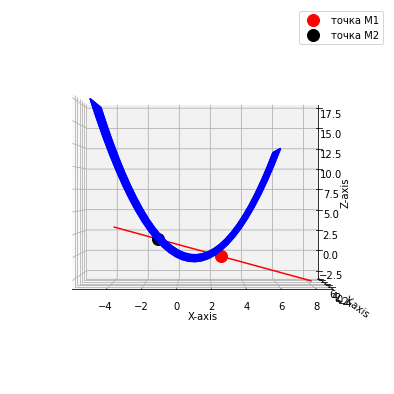

In [47]:
# Построение цилиндра
x = np.linspace(-5, 6, 30)
y = np.linspace(-5, 6, 30)

x, y = np.meshgrid(x, y)
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
z = (x**2 - 2 * x) / 2
ax.plot_wireframe(x, y, z, color="b")

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# Построение прямой по двум точкам
x1 = np.array([p1[0], р2[0]])
y1 = np.array([p1[1], р2[1]])
z1 = np.array([p1[2], р2[2]])

ax.plot(x1, y1, z1, color="r")
ax.plot(2 / 3 + np.sqrt(34) / 3, 13 / 9 - np.sqrt(34) / 9, 2 / 3 - np.sqrt(34) / 6, "or", markersize=12, label="точка M1")
ax.plot(2 / 3 - np.sqrt(34) / 3, np.sqrt(34) / 9 + 13 / 9, 2 / 3 + np.sqrt(34) / 6, "ok", markersize=12, label="точка M2")
ax.legend()
ax.view_init(0, -90)
plt.show()